# Librerías

In [1]:
import numpy as np #para manejar arreglos
from matplotlib import pyplot as plt #para graficar

plt.rcParams["figure.figsize"] = (10,5) #tamaño de los gráficos: ancho x alto

# Resolución numérica de ecuaciones diferenciales
## ¿Cuál es la idea/objetivo?

---

# Método de Euler explícito

## Ejemplo

### Queremos usar el método de Euler explícito para aproximar $x(2)$ dado por la ecuación diferencial (mejor dicho el PVI):

$$\begin{cases}
x'(t)&=x(t)\\
x(0)&=1
\end{cases}
$$

1. ### Definir el método de Euler (misma idea de siempre, primero una función que dé UN SOLO paso, y luego otra que dé muchos pasos usando la anterior).

1. ### Apromixar $x(2)$ usando el método de Euler con 5, 10, 50 y 100 pasos. Graficar la función $e^t$ (que es sol. exacta de la ec. dif.) para t entre 0 y 2 junto con las aproximaciones obtenidas por Euler. ¿Qué se observa?


In [4]:
# defino el paso
def paso_euler_explicito(x, t, h, f):
  x_sig = x + h*f(t,x)
  return x_sig


# defino el método
def metodo_euler_explicito(x0, t0, h, f, cant_pasos):
  x = x0
  t = t0

  valores_x = np.array([]) #vector vacío
  valores_x = np.append(valores_x, x0) #agrego elemento al final del vector

  for i in range(0, cant_pasos, 1):
    x_sig = paso_euler_explicito(x, t, h, f) #uso la función que me calcula un paso

    valores_x = np.append(valores_x, x_sig) #agrego elemento al final del vector

    # actualizo para poder seguir calculando los siguientes
    t = t + h
    x = x_sig

  return valores_x

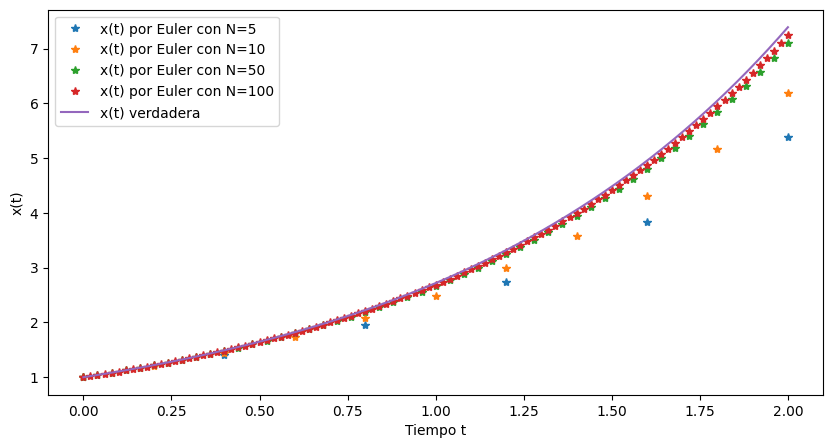

In [14]:
# Aproximo por Euler explícito la sol. de la ec. dif. que me dan.

def func_ejer(t,x):
  y = x
  return y

x0 = 1
t0 = 0
tf = 2

for N in [5, 10, 50, 100]:
  h = (tf-t0)/N
  # a los tiempos ya sé cómo calcularlos
  vals_t = np.linspace(t0, t0+N*h, N+1) #recordar el linspace: inicio, fin (inclusive), cantidad de valores equiespaciados
  vals_x = metodo_euler_explicito(x0, t0, h, func_ejer, N)
  plt.plot(vals_t ,vals_x, '*', label='x(t) por Euler con N={}'.format(N))

vals_t_graf = np.linspace(0,2,10000)
vals_x_func = np.exp(vals_t_graf)
plt.plot(vals_t_graf, vals_x_func, label='x(t) verdadera')
plt.xlabel('Tiempo t')
plt.ylabel('x(t)')
plt.legend()

## Ejemplo

### Consideremos el PVI:

$$
\begin{cases}
x'(t)&=t\cos(x(t))\\
x(0)&=3
\end{cases}
$$

1. ### Papel y lápiz: calcular el tamaño del paso a priori necesario para estimar $x(2)$ con un error menor a $10^{-3}$ usando el método de Euler. (Mirar error global de Euler de las diapos de la teórica).

1. ### Usar el método de Euler explícito para aproximar la solución del PVI con $t$ entre 0 y 2, para el tamaño de paso averiguado en el ítem anterior. Graficar los resultados obtenidos.

Cantidad de pasos 142857


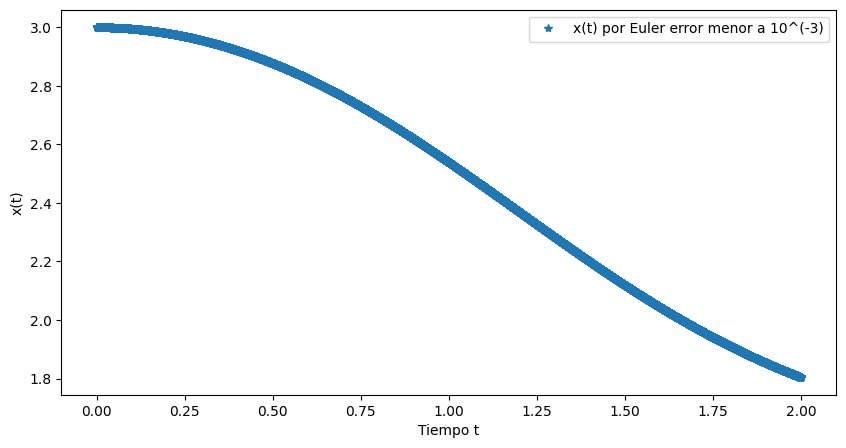

In [15]:
# defino la función
def func_ejer2(t,x):
  y = t*np.cos(x)
  return y


# aproximo la sol. por Euler explícito
x0 = 3
t0 = 0
tf = 2
h = 1.4*10**(-5)
# h = 10**(-6) #probar este y ver como aumenta MUCHO la cantidad de pasos
N = int( (tf-t0)/h ) #devuelve parte entera: detalle técnico para que N sea entero y el range no se queje.

vals_t = np.linspace(t0, t0+N*h, N+1)
vals_x = metodo_euler_explicito(x0, t0, h, func_ejer2, N)
plt.plot(vals_t ,vals_x, '*', label='x(t) por Euler error menor a 10^(-3)')
plt.xlabel('Tiempo t')
plt.ylabel('x(t)')
plt.legend()

print('Cantidad de pasos', N) #¡son muchos! ¿por qué?

---
# Método de Taylor

## Charlar diferencias contra Euler explícito

In [ ]:
def paso_taylor(x, t, h, f, ft, fx):
  k = ft(t,x) + fx(t,x)*f(t,x)
  x_sig = x + h*f(t,x) + 0.5*(h**2)*k
  return x_sig


def metodo_taylor(x0, t0, h, f, ft, fx, cant_pasos):
  x = x0
  t = t0

  valores_x = np.array([]) #vector vacío
  valores_x = np.append(valores_x, x0) #agrego elemento al final

  valores_t = np.array([])
  valores_t = np.append(valores_t, t0) #agrego elemento al final

  for i in range(0,cant_pasos,1):
    x_sig = paso_taylor(x, t, h, f, ft, fx)

    valores_x = np.append(valores_x, x_sig) #agrego elemento al final del vector

    t_sig = t + h
    valores_t = np.append(valores_t, t_sig) #agrego elemento al final del vector

    t = t_sig
    x = x_sig

  return valores_t, valores_x

## Ejemplo Taylor

$$
\begin{cases}
x'(t)&=t\cos(x(t))\\
x(0)&=3
\end{cases}
$$

### Usar el método de Taylor para aproximar la solución del PVI con $t$ entre 0 y 2. Graficar los resultados obtenidos.

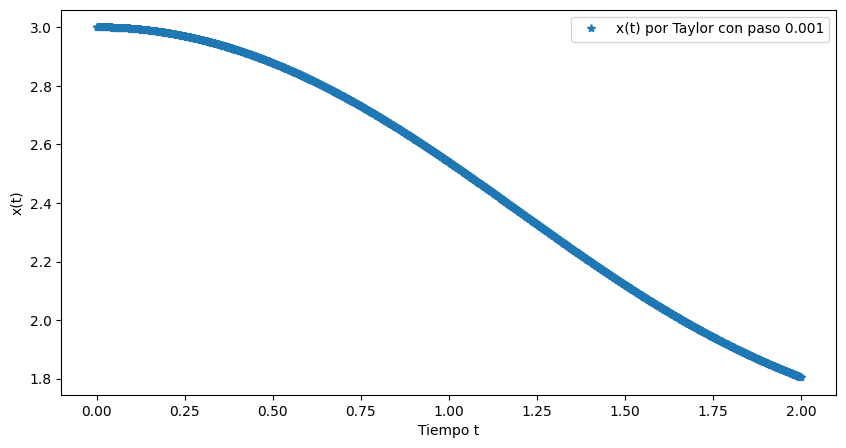

In [ ]:
def func(t,x):
  y = t*np.cos(x)
  return y

def func_deriv_t(t,x):
  y = np.sin(x)
  return y

def func_deriv_x(t,x):
  y = (-1)*t*np.sin(x)
  return y


x0 = 3
t0 = 0
tf = 2
h = 10**(-3)
N = int( (tf-t0)/h ) #devuelve parte entera: detalle técnico para que N sea entero y el range no se queje.

vals_t, vals_x = metodo_taylor(x0, t0, h, func, func_deriv_t, func_deriv_x, N)
plt.plot(vals_t ,vals_x, '*', label='x(t) por Taylor con paso {}'.format(h))
plt.xlabel('Tiempo t')
plt.ylabel('x(t)')
plt.legend()

---
# Comparar los códigos de `metodo_euler_explicito` y de `metodo_taylor`. ¿Qué diferencias observa?

---
# Método de Heun.

### Observación: Heun es Runge-Kutta de orden 2.

In [ ]:
def paso_heun(x, t, h, f):
  k1 = f(t,x)
  k2 = f(t+h, x+h*k1)
  x_sig = x + 0.5*h*(k1+k2)
  return x_sig


# def metodo_heun(x0, t0, h, f, cant_pasos):

#   ...

#   return valores_t, valores_x

# Runge-Kutta de orden 4.

## Charlar diferencias vs. Taylor

In [ ]:
# def paso_runge_kutta_4(...):
#   ...
#   return ...


# def metodo_runge_kutta_4(...):
#   ...
#   return ...

# Ejercicios de la guía